In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

loading dataset:

In [2]:
dataset = pd.read_csv('https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4', index_col = "REQUEST_ID")
dataset

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
REQUEST_ID,,,,,,,,,,,,,,,,
203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
201310.0,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477503.0,2020-11-07T18:36:00,Tenant/Landlord Problems,Website,0,311,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,-79.888944,40.450762,APPROXIMATE
477504.0,2020-11-07T18:36:00,Police Department,Website,0,311,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,-79.889252,40.450779,APPROXIMATE
477505.0,2020-11-07T18:37:00,Litter,Website,0,DPW - Street Maintenance,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,-79.887391,40.451165,EXACT


overall count for which neighborhood has most 311 calls:

In [3]:
totalentries = len(dataset)

dataset['NEIGHBORHOOD'].value_counts().sort_values(ascending = False)

Brookline               18309
Carrick                 17352
Squirrel Hill South     15129
South Side Slopes       14723
South Side Flats        13790
                        ...  
East Carnegie             425
Northview Heights         420
Glen Hazel                290
Arlington Heights          87
Mount Oliver Borough       59
Name: NEIGHBORHOOD, Length: 91, dtype: int64

this is a lot of data, and not all of it may be relevant currently

in the data dictionary, a status of 0 means its a new entry

we can use a filter to only get entries with a status of 0, meaning it is new

In [4]:
filtered_dataset = dataset[dataset.STATUS == 0]
filtered_dataset

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
REQUEST_ID,,,,,,,,,,,,,,,,
179176.0,2017-08-14T14:00:00,Neighborhood Issues,Control Panel,0,NaN,Middle Hill,6.0,5.0,4.200305e+10,3.0,5.0,2.0,2-1,-79.977726,40.446142,APPROXIMATE
182748.0,2017-08-28T12:49:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.029944,40.486596,APPROXIMATE
184662.0,2017-09-05T13:49:00,Abandoned Vehicle (parked on street),Call Center,0,Police - AVU,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.027634,40.470334,APPROXIMATE
185902.0,2017-09-11T13:49:00,Parks Trails,Call Center,0,DPW - Park Maintenance,NaN,6.0,1.0,4.200302e+10,NaN,1.0,NaN,1-4,-80.005966,40.438043,EXACT
167825.0,2017-07-06T15:26:00,Illegal Dumping,Control Panel,0,DOMI - Permits,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-20,-79.997763,40.452695,APPROXIMATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477503.0,2020-11-07T18:36:00,Tenant/Landlord Problems,Website,0,311,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,-79.888944,40.450762,APPROXIMATE
477504.0,2020-11-07T18:36:00,Police Department,Website,0,311,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,-79.889252,40.450779,APPROXIMATE
477505.0,2020-11-07T18:37:00,Litter,Website,0,DPW - Street Maintenance,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,-79.887391,40.451165,EXACT


In [5]:
nbhcount = filtered_dataset['NEIGHBORHOOD'].value_counts().sort_values(ascending = False)
nbhcount

Brookline                    1203
Central Business District     968
Carrick                       826
Mount Washington              820
Beechview                     790
                             ... 
Ridgemont                      25
St. Clair                      23
Chartiers City                 20
Mount Oliver Borough           10
Arlington Heights               2
Name: NEIGHBORHOOD, Length: 91, dtype: int64

as a graph

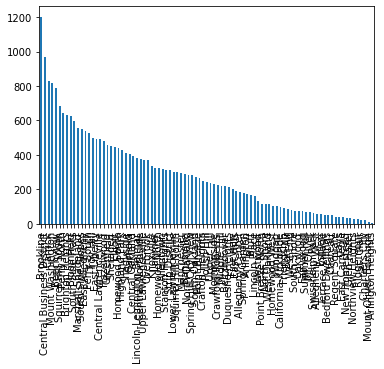

In [6]:
nbhcount.plot.bar()

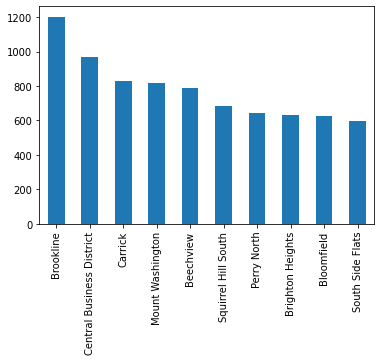

In [7]:
nbhcount.head(10).plot.bar()

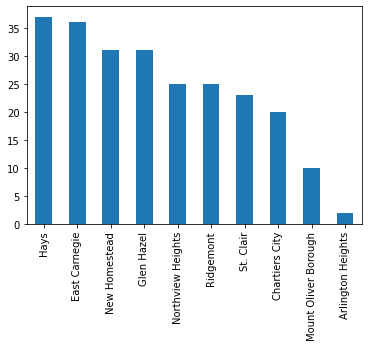

In [8]:
nbhcount.tail(10).plot.bar()

In [9]:
distressedhousing = pd.read_csv("https://data.wprdc.org/dataset/12edd529-5119-49c7-92b5-15314b3ae25e/resource/a1f3ffd9-34bf-4255-97a8-af8084894159/download/poorhousingconditions.csv",
                               index_col="TRACT")

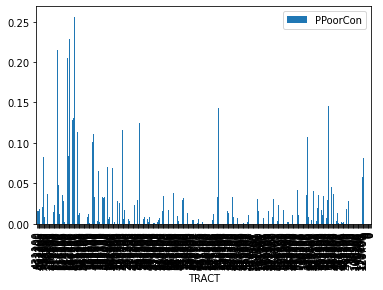

In [10]:
distressedhousing.plot.bar()

In [11]:
newdh = distressedhousing.loc[~(distressedhousing==0).all(axis=1)]
#dropping the zero rows, since it was specified that the zeroes are due to insufficient sampling.
mindh = newdh["PPoorCon"].min()
#finding min percentage of distressed housing
print(mindh)

0.00043099999999999996


In [12]:
newdh.loc[newdh["PPoorCon"] == mindh].iloc[0]
#finding the census tract with the least percentage of distressed housing

PPoorCon    0.000431
Name: 456004, dtype: float64

Census Tract 4560.04 corresponds to Upper St Clair and Boyce Park, so this helps determine USC to be the best neighborhood in Pittsburgh.

In [13]:
fire = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")

In [14]:
fire["neighborhood"].replace("", np.nan, inplace=True)
fire.dropna(subset=["neighborhood"], inplace=True)

In [15]:
fire["neighborhood"].replace("", np.nan, inplace=True)
fire.dropna(subset=["neighborhood"], inplace=True)

In [16]:
neighborhoods = fire['neighborhood'].unique()
neighborhoods = sorted(neighborhoods)

In [17]:
type_penalty = []
for neighborhood in neighborhoods:
    type_penalty.append(0)

count = 0
while count < fire['call_no'].count():
    neighborhood_penalty = 0
    if fire.iloc[count,1] == 131 or fire.iloc[count,1] == 150 or fire.iloc[count,1] == 151 or fire.iloc[count,1] == 118 or fire.iloc[count,1] == 142 or fire.iloc[count,1] == 160 or fire.iloc[count,1] == 130 or fire.iloc[count,1] == 112 or fire.iloc[count,1] == 138 or fire.iloc[count,1] == 162 or fire.iloc[count,1] == 100 or fire.iloc[count,1] == 154 or fire.iloc[count,1] == 143 or fire.iloc[count,1] == 140 or fire.iloc[count,1] == 117 or fire.iloc[count,1] == 132 or fire.iloc[count,1] == 133 or fire.iloc[count,1] == 120 or fire.iloc[count,1] == 134 or fire.iloc[count,1] == 155 or fire.iloc[count,1] == 173 or fire.iloc[count,1] == 171 or fire.iloc[count,1] == 164 or fire.iloc[count,1] == 170 or fire.iloc[count,1] == 122 or fire.iloc[count,1] == 137:
        neighborhood_penalty = 2
        
    if fire.iloc[count,1] == 111 or fire.iloc[count,1] == 152 or fire.iloc[count,1] == 136 or fire.iloc[count,1] == 161 or fire.iloc[count,1] == 153 or fire.iloc[count,1] == 141 or fire.iloc[count,1] == 123 or fire.iloc[count,1] == 163 or fire.iloc[count,1] == 121:
        neighborhood_penalty = 10

    neighborhood = fire.iloc[count,8]
    type_penalty[neighborhoods.index(neighborhood)] = type_penalty[neighborhoods.index(neighborhood)] + neighborhood_penalty
    count = count + 1
        

In [18]:
fire_alarms = fire.groupby("neighborhood").sum()
fire_alarms.head(10)

,incident_type,alarms,census_tract,council_district,ward,tract,public_works_division,pli_division,police_zone,latitude,longitude
neighborhood,,,,,,,,,,,
Allegheny Center,6429.0,24,107907.0,50.0,1100.0,2.100178e+12,50.0,1100.0,50.0,1982.192633,-3920.246192
Allegheny West,4606.0,10,73741.0,34.0,748.0,1.428121e+12,59.0,748.0,34.0,1334.878795,-2640.494942
Allentown,12322.0,75,179709.0,297.0,1782.0,4.158315e+12,416.0,1782.0,297.0,3920.944019,-7759.406504
Arlington,5257.0,23,64160.0,120.0,640.0,1.680142e+12,155.0,640.0,120.0,1616.651186,-3198.912662
Arlington Heights,1443.0,9,19252.0,36.0,192.0,5.040427e+11,43.0,192.0,36.0,485.010786,-959.569919
Banksville,6405.0,23,100489.0,100.0,1000.0,2.100160e+12,250.0,1000.0,300.0,1980.158414,-3921.918881
Bedford Dwellings,4173.0,28,17298.0,204.0,170.0,1.428104e+12,102.0,170.0,68.0,1375.303952,-2719.147271
Beechview,14635.0,59,220390.0,446.0,2194.0,4.830367e+12,575.0,2194.0,690.0,4525.984193,-8962.738202
Beltzhoover,13325.0,74,196471.0,329.0,1927.0,4.494381e+12,447.0,1927.0,321.0,4324.744016,-8560.290354


In [19]:
alarm_list = []
row_count = 0
while row_count < fire_alarms['alarms'].count():
    new_alarm = fire_alarms.iloc[row_count,1]
    alarm_list.append(new_alarm)
    row_count = row_count + 1

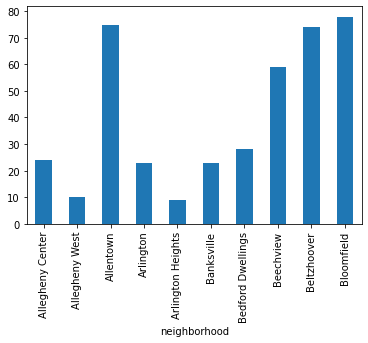

In [20]:
fire_alarms["alarms"].head(10).plot.bar()

In [21]:
fires_amt = []

In [22]:
for hood in neighborhoods:
    count = (fire['neighborhood'] == hood).sum()
    fires_amt.append(count)

In [23]:
fire_data = pd.DataFrame({'Neighborhoods': neighborhoods, 'Alarms': alarm_list, 'Fires': fires_amt, 'Severity Index': type_penalty})

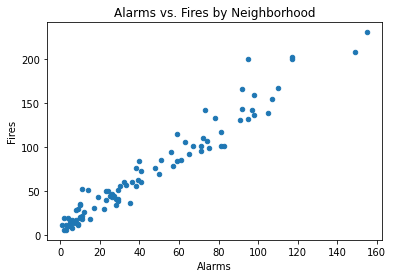

In [24]:
fire_data.plot(kind='scatter', x='Alarms', y='Fires', title="Alarms vs. Fires by Neighborhood")

In [25]:
row_count = 0
final_scores = []
while row_count < fire_data["Neighborhoods"].count():
    score = fire_data.iloc[row_count, 2] + (fire_data.iloc[row_count,1]/fire_data.iloc[row_count,2]) + fire_data.iloc[row_count,3]/10
    final_scores.append(score)
    row_count = row_count + 1

In [26]:
score_data = pd.DataFrame({"Neighborhoods": neighborhoods, "Scores": final_scores})
final_data = pd.merge(fire_data, score_data)
final_data = final_data.sort_values(by=['Scores'])
final_data = final_data.reset_index()
final_data = final_data.drop(['index'], axis=1)
final_data.head(20)

,Neighborhoods,Alarms,Fires,Severity Index,Scores
0,Regent Square,3,6,18,8.300000
1,Mount Oliver Borough,2,6,28,9.133333
2,East Carnegie,6,8,26,11.350000
3,St. Clair,4,11,26,13.963636
4,Arlington Heights,9,12,18,14.550000
5,Ridgemont,1,12,32,15.283333
6,Mt. Oliver,5,10,50,15.500000
7,Hays,3,12,40,16.250000
8,Chartiers City,5,13,44,17.784615
9,Oakwood,9,13,50,18.692308
